In [ ]:
### tried some AC/NU cla

In [1]:
import os
import dask.dataframe as dd
from dask.distributed import Client
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '/home/djl34/lab_pd/kl/git/KL/scripts')
import post_analysis

pd.set_option('display.max_columns', None)

pd_data_dir = "/home/djl34/lab_pd/data"
aso_data_dir = "/home/djl34/lab_pd/aso/data"
KL_data_dir = "/home/djl34/lab_pd/kl/data"
scratch_dir = "/n/scratch/users/d/djl34"

all_chrom_set = [str(x) for x in range(1, 23)]
chrom_set = all_chrom_set

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
client = Client()

In [3]:
filename = os.path.join(KL_data_dir, "results/footprints/mu_sum/{chrom}.tsv")
filename = filename.replace("{chrom}", "*")

In [4]:
ddf = dd.read_csv(filename, sep = "\t", dtype={'Spliceai_info': 'object'})

In [5]:
df = ddf.compute()

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [6]:
df["NU"] = df["AN_mean"] * df["mu"]
df["AC/NU"] = df["AC_total"] /df["AN_mean"] * df["mu"]

In [18]:
df["denovo_an_case"].sum()

3729.0

In [19]:
df["denovo_an_control"].sum()

3648.0

In [9]:
df["NU"].mean()

2310263.4969863216

In [10]:
df["NU"].min()

10795.92

In [7]:
len(df[df["sites"] >= 30])

2963546

In [ ]:
len(df[df["sites"] >= 30])

In [11]:
df_30 = df[df["sites"] >= 30]

In [12]:
per_generation_factor = 1.015 * 10 **-7

df_30["rate_pergen"] = df_30["mu"] * per_generation_factor * 1902

/tmp/ipykernel_32094/1470700933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30["rate_pergen"] = df_30["mu"] * per_generation_factor * 1902


In [30]:
df_30.to_csv(os.path.join(KL_data_dir, "results/footprints/AC_NU_30sites_cutoff.tsv"), sep = "\t")

In [15]:
df_30.head()

,footprint_identifier,mu,AC_total,denovo_an_case,denovo_an_control,AN_mean,sites,NU,AC/NU,rate_pergen
0,1.102814.3,4.278,21.0,0.0,0.0,550917.515152,33,2.356825e+06,0.000163,0.000826
1,1.102814.44,11.287,432.0,0.0,0.0,549097.975309,81,6.197669e+06,0.008880,0.002179
2,1.102814.47,16.900,134.0,0.0,0.0,550766.588235,136,9.307955e+06,0.004112,0.003263
3,1.102821.4,6.963,473.0,0.0,0.0,552212.023810,84,3.845052e+06,0.005964,0.001344
4,1.1029632.1,6.412,197.0,0.0,0.0,552300.055556,90,3.541348e+06,0.002287,0.001238


In [19]:
df_30 = df_30.sort_values("AC/NU")

In [ ]:
df_30[df_30["AC_total"] != 0].median()

In [45]:
df_30["NU"].median()

2194903.190706349

In [14]:
df_30["rate_pergen"].sum()

2832.447608479001

In [16]:
df_30["denovo_an_case"].sum()

3219.0

In [17]:
df_30["denovo_an_control"].sum()

3128.0

### let's get a distribution of AN for footprints

In [31]:
df_30['decile'] = pd.qcut(df_30['AC/NU'], 10, labels=False)


/tmp/ipykernel_22857/2517124827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30['decile'] = pd.qcut(df_30['AC/NU'], 10, labels=False)


In [32]:
df_decile = df_30[["decile", "denovo_an_case", "denovo_an_control", "rate_pergen"]].groupby("decile").sum().reset_index()


In [35]:
df_decile["ratio_affected"] = df_decile["denovo_an_case"]/df_decile["rate_pergen"]
df_decile["ratio_control"] = df_decile["denovo_an_control"]/df_decile["rate_pergen"]

<AxesSubplot:xlabel='decile', ylabel='ratio_affected'>

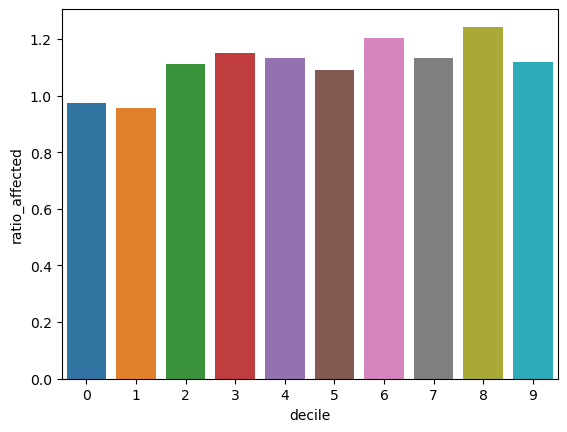

In [37]:
sns.barplot(df_decile, x="decile", y="ratio_affected")


<AxesSubplot:xlabel='decile', ylabel='ratio_control'>

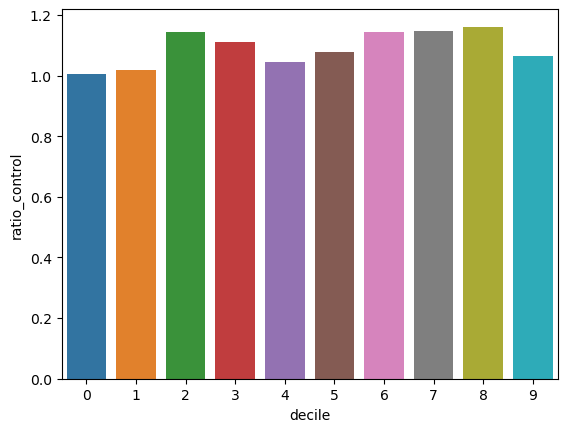

In [38]:
sns.barplot(df_decile, x="decile", y="ratio_control")


## do it for a cutoff

### top 1%

In [29]:
length = len(df_30)
cutoff = int(length * 0.01)

df_30_cutoff = df_30.iloc[0:cutoff]

In [27]:
df_30_cutoff["mu"].mean()

2.038855103762443

In [43]:
df_30_cutoff["rate_pergen"].sum()

6.007423447052999

In [31]:
df_30_cutoff["denovo_an_case"].sum()/df_30_cutoff["rate_pergen"].sum()

1.1144882733926862

In [32]:
df_30_cutoff["denovo_an_control"].sum()/df_30_cutoff["rate_pergen"].sum()

1.200218140576739

### top 0.5%

In [34]:
length = len(df_30)
cutoff = int(length * 0.005)

df_30_cutoff = df_30.iloc[0:cutoff]

In [35]:
df_30_cutoff["denovo_an_case"].sum()/df_30_cutoff["rate_pergen"].sum()

1.6646071461644008

In [36]:
df_30_cutoff["denovo_an_control"].sum()/df_30_cutoff["rate_pergen"].sum()

1.6646071461644008

## do mu cutoff too

In [37]:
df_30_mu = df_30[df_30["mu"] >= df_30["mu"].mean()]

In [39]:
length = len(df_30_mu)
cutoff = int(length * 0.01)

df_30_mu_cutoff = df_30_mu.iloc[0:cutoff]

In [44]:
df_30_mu_cutoff["rate_pergen"].sum()

12.259288865229

In [40]:
df_30_mu_cutoff["denovo_an_case"].sum()/df_30_mu_cutoff["rate_pergen"].sum()

0.9788495998357278

In [41]:
df_30_mu_cutoff["denovo_an_control"].sum()/df_30_mu_cutoff["rate_pergen"].sum()

1.3051327997809705

In [42]:
df_30_mu_cutoff

,footprint_identifier,mu,AC_total,denovo_an_case,denovo_an_control,AN_mean,sites,NU,AC/NU,rate_pergen
87386,9.8146706.2,9.680,0.0,0.0,0.0,552282.000000,168,5.346090e+06,0.00000,0.001869
87181,9.814103.4,5.290,0.0,0.0,0.0,552133.000000,96,2.920784e+06,0.00000,0.001021
128090,11.90125.2,5.474,0.0,0.0,0.0,552254.000000,78,3.023038e+06,0.00000,0.001057
86622,17.732326.2,7.788,0.0,0.0,0.0,552241.000000,48,4.300853e+06,0.00000,0.001503
13136,22.532186.4,5.074,0.0,0.0,0.0,552280.000000,72,2.802269e+06,0.00000,0.000980
...,...,...,...,...,...,...,...,...,...,...
70060,22.905375.7,5.556,7.0,0.0,0.0,552191.000000,39,3.067973e+06,0.00007,0.001073
96465,19.998398.4,6.482,6.0,0.0,0.0,552090.000000,60,3.578647e+06,0.00007,0.001251
136919,11.9416867.4,5.545,7.0,0.0,0.0,550985.121951,82,3.055213e+06,0.00007,0.001070
35451,10.303286.7,5.558,7.0,0.0,0.0,552274.020202,99,3.069539e+06,0.00007,0.001073
